# Tarea 9

In [1]:
Pkg.add("PyPlot")
Pkg.add("SymPy")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
using PyPlot;
plt = PyPlot;
using SymPy;

In [3]:
function derivadaNumerica(f,x0,h)
    (f(x0+h)-f(x0))/h
end

derivadaNumerica (generic function with 1 method)

In [4]:
derivadaNumerica(x->x^2,2,0.0001)

4.0001000000078335

## Ejercicio 2

In [5]:
derivadaNumerica(x->cos(x),0.5,0.0001)

-0.4794694169341085

In [6]:
-sin(0.5)

-0.479425538604203

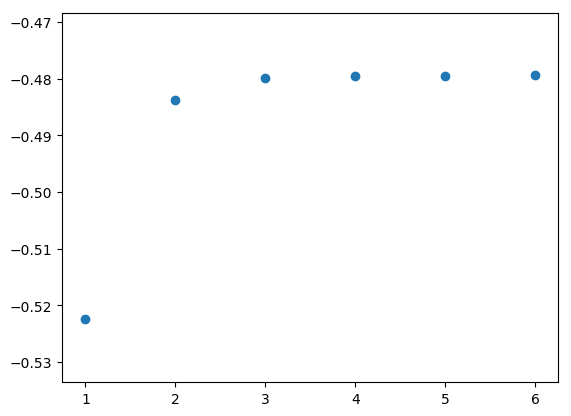

PyObject <matplotlib.collections.PathCollection object at 0x10f630150>

In [7]:
A = [0.1,0.01,0.001,0.0001,0.00001,0.000001]
B=[]
for j in A
    push!(B,1/j)
end
F=[]
for i in A
   push!(F,derivadaNumerica(x->cos(x),0.5,i))
end
plt.scatter(log10.(B),F)

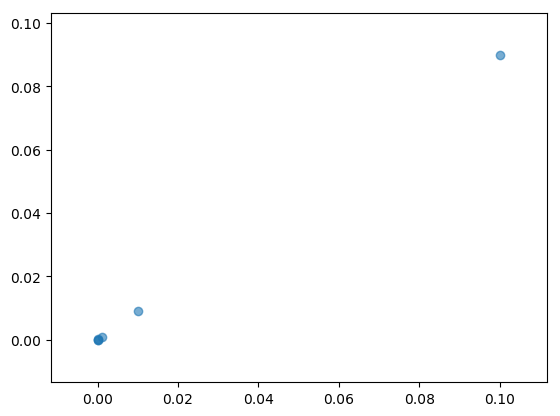

PyObject <matplotlib.collections.PathCollection object at 0x12f11f090>

In [13]:
A = [0.1,0.01,0.001,0.0001,0.00001,0.000001]
F = []
x0 = 0.5
for i in A
   push!(F,derivadaNumerica(x->cos(x),x0,i))
end
G = (F + sin(x0) )/ (-sin(x0))
plt.scatter(A,G, alpha=0.6)

## Ejercicio 3

Se tiene que la serie de Taylor para $f(x+h)$, con $h<<1$, es: 

$$f(x+h) = f(x+h)|_{h=0} + hf'(x+h)|_{h=0} + ... = f(x) + hf'(x) + \mathcal{O}(h^2)$$

Por otro lado, la serie de Taylor para $f(x-h)$, con $h<<1$, es:

$$f(x-h) = f(x-h)|_{h=0} -hf'(x-h)|_{h=0} + ... = f(x) - hf'(x) + \mathcal{O}(h^2)$$

Restando $f(x+h) - f(x-h)$ se tiene que:

$$f(x+h) - f(x-h) + \mathcal{O}(h^2) = 2hf'(x)$$

es decir,

$$f'(x) + \mathcal{O}(h^2) = \frac{f(x+h) - f(x-h)}{2h}$$

lo que significa que

$$\mathcal{O}(h^2) = \frac{f(x+h) - f(x-h)}{2h} - f'(x)$$

De donde se concluye que la derivada numérica a orden 1 tiene un error de orden 2 en h.

Sí es posible, utilizando métodos como el de "coeficientes de diferencia finita".

## Ejercicio 4

In [19]:
function derivada_Simetrica(f,x0,h)
    (f(x0+h)-f(x0-h))/2h
end

derivada_Simetrica (generic function with 1 method)

In [20]:
derivada_Simetrica(x->cos(x),0.5,0.0001)

-0.4794255378054446

In [17]:
-sin(0.5)

-0.479425538604203

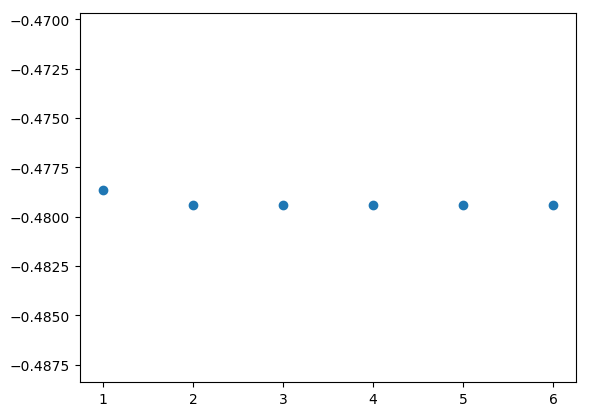

PyObject <matplotlib.collections.PathCollection object at 0x1342a0910>

In [21]:
A = [0.1,0.01,0.001,0.0001,0.00001,0.000001]
B=[]
for j in A
    push!(B,1/j)
end
F=[]
for i in A
   push!(F,derivada_Simetrica(x->cos(x),0.5,i))
end
plt.scatter(log10.(B),F)

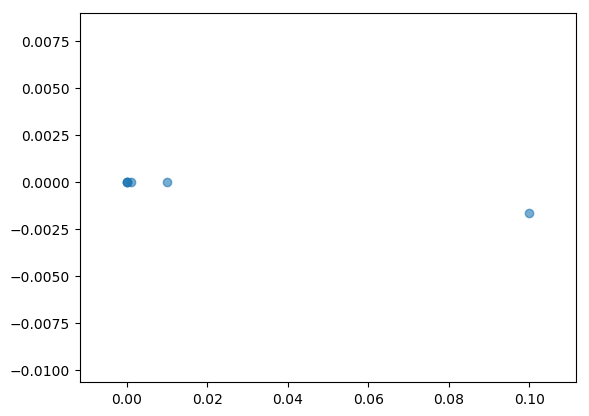

PyObject <matplotlib.collections.PathCollection object at 0x13444cb90>

In [22]:
A = [0.1,0.01,0.001,0.0001,0.00001,0.000001]
F = []
x0 = 0.5
for i in A
   push!(F,derivada_Simetrica(x->cos(x),x0,i))
end
G = (F + sin(x0) )/ (-sin(x0))
plt.scatter(A,G, alpha=0.6)

## Ejercicio 5

Se tiene que

\begin{eqnarray}
f(x+h)-f(x)&=& \left[h \left. \frac{d}{d \xi}  \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}   \right|_{\substack{ \xi_{1}=x }} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}   \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)\right]f{\left (x \right )}\\
&=&\left[ \sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} \right]f(x)
\end{eqnarray}

$$\Delta_h:f \mapsto f(x+h)-f(x)=\Delta f(x,h)$$

Para verificar que $\Delta_h$ es lineal, lo aplicaré a $f + \lambda g$, donde $\lambda$ es un real. Entonces:

\begin{eqnarray}
\Delta _h (f + \lambda g) &=& (f + \lambda g)(x+h) - (f + \lambda g)(x) \\
&=& f(x+h) + \lambda g(x+h) - f(x) - \lambda g(x) \\
&=& f(x+h) - f(x) + \lambda [g(x+h) - g(x)] \\
&=& \Delta_h f + \lambda \Delta_h g
\end{eqnarray}

Así:

$$\Delta_h f(x) = f(x+h)-f(x) = \left[ \sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} \right] f(x)$$ 

es decir,

$$\Delta_h = \left[ \sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} \right]$$

## Ejercicio 6

Se quiere determinar la función $\phi$ que cumple que 

$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$

donde 

$$\Delta_h = \left[ \sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} \right]$$

Entonces 

$$ \phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right) = \left[ \sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} \right]$$

La serie de Taylor para $g(x) = e^x$ alrededor de $x=0$ es 

$$ \phi(x) = \sum_{n=0}^{\infty} \frac{1}{n!}x^n$$

Si sustituyo en dicha serie, $x \mapsto h\frac{d}{d\xi}$, entonces se tiene

$$\phi (h\frac{d}{d\xi}) =  \left[ \sum_{n=0}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} \right]$$

que es de hecho $\Delta_h + 1$. Por ello, 

$$ \Delta_h = \phi (h\frac{d}{d\xi}|_{\substack{ \xi=x }}) - 1 = \left[ \sum_{n=0}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} \right] - 1 = e^{h\frac{d}{d\xi}|_{\substack{ \xi=x }}} - 1 $$

Entonces $\phi (x) = e^x -1$

Despejando $\frac{d}{d\xi}|_{\substack{ \xi=x }}$ se tiene que 

$$\Delta_h = e^{h\frac{d}{d\xi}|_{\substack{ \xi=x }}} - 1 \Longleftrightarrow e^{h\frac{d}{d\xi}|_{\substack{ \xi=x }}} = \Delta_h + 1$$

es decir,$\frac{d}{d\xi}|_{\substack{ \xi=x }} = \frac{1}{h}\log\left(1+\Delta_h\right)$

Aplicando la serie de Taylor a $ln$ con $\Delta_h$ cercano a $0$ se tiene que 

$$\frac{d}{d\xi}|_{\substack{ \xi=x }} = \frac{1}{h} \left( \Delta_h-\frac{1}{2}\Delta^2_h +\dots\right)$$